<a href="https://colab.research.google.com/github/BeatrizFS/TccXaiSkinLesions/blob/main/Review_%5BAlexNet%5D_(Classifica%C3%A7%C3%A3o_de_les%C3%B5es_de_pele_Benignas_x_Malignas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base de dados ISIC

In [ ]:
#API Key do Kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"beatriz007","key":"933faac969c0a66b69a5f1387b68a733"}'}

In [ ]:
#Install Kaggle
!pip install kaggle -q

In [ ]:
#Configura o ambiente para interagir com a API do Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Acessa o diretório do dataset no Kaggle
%cd /content/
!kaggle datasets download andrewmvd/isic-2019

/content
Dataset URL: https://www.kaggle.com/datasets/andrewmvd/isic-2019
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
100% 9.10G/9.10G [07:23<00:00, 19.9MB/s]
100% 9.10G/9.10G [07:23<00:00, 22.0MB/s]


In [ ]:
#Extrai o conteúdo do diretório e carrega na pasta ISIC_data
!unzip /content/isic-2019.zip -d ISIC_data

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: ISIC_data/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065358.jpg  
  inflating: ISIC_data/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065359.jpg  
  inflating: ISIC_data/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065360.jpg  
  inflating: ISIC_data/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065361.jpg  
  inflating: ISIC_data/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065362.jpg  
  inflating: ISIC_data/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065366.jpg  
  inflating: ISIC_data/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065367.jpg  
  inflating: ISIC_data/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065368.jpg  
  inflating: ISIC_data/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065370.jpg  
  inflating: ISIC_data/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065371.jpg  
  inflating: ISIC_dat

# Análise exploratória

In [ ]:
#Quantidade de imagens
import os

pasta_imagens = "/content/ISIC_data/ISIC_2019_Training_Input/ISIC_2019_Training_Input"
imagens = [f for f in os.listdir(pasta_imagens) if f.endswith(('.jpg', '.jpeg', '.png'))]
print(f"Quantidade total de imagens: {len(imagens)}")


Quantidade total de imagens: 25331


In [ ]:
import pandas as pd

# Caminho do arquivo CSV
file_path = '/content/ISIC_data/ISIC_2019_Training_Metadata.csv'

# Carregar o CSV em um DataFrame
data = pd.read_csv(file_path)

# Exibir os nomes das colunas
print("Colunas do CSV:")
print(data.columns)

# Exibir as primeiras 5 linhas como amostra
print("\nAmostra dos dados:")
print(data.head())

Colunas do CSV:
Index(['image', 'age_approx', 'anatom_site_general', 'lesion_id', 'sex'], dtype='object')

Amostra dos dados:
          image  age_approx anatom_site_general lesion_id     sex
0  ISIC_0000000        55.0      anterior torso       NaN  female
1  ISIC_0000001        30.0      anterior torso       NaN  female
2  ISIC_0000002        60.0     upper extremity       NaN  female
3  ISIC_0000003        30.0     upper extremity       NaN    male
4  ISIC_0000004        80.0     posterior torso       NaN    male


In [ ]:
import pandas as pd

# Caminho do arquivo CSV
file_path = '/content/ISIC_data/ISIC_2019_Training_GroundTruth.csv'

# Carregar o CSV em um DataFrame
data = pd.read_csv(file_path)

# Exibir os nomes das colunas
print("Colunas do CSV:")
print(data.columns)

# Exibir as primeiras 5 linhas como amostra
print("\nAmostra dos dados:")
print(data.head())


Colunas do CSV:
Index(['image', 'MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK'], dtype='object')

Amostra dos dados:
          image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK
0  ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
1  ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
2  ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
3  ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
4  ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0


In [ ]:
import pandas as pd

# Caminho do arquivo CSV
file_path = '/content/ISIC_data/ISIC_2019_Training_Metadata.csv'

# Carregar o CSV em um DataFrame
data = pd.read_csv(file_path)

# Exibir os nomes das colunas
print("Colunas do CSV:")
print(data.columns)

# Exibir as primeiras 5 linhas como amostra
print("\nAmostra dos dados:")
print(data.head())


Colunas do CSV:
Index(['image', 'age_approx', 'anatom_site_general', 'lesion_id', 'sex'], dtype='object')

Amostra dos dados:
          image  age_approx anatom_site_general lesion_id     sex
0  ISIC_0000000        55.0      anterior torso       NaN  female
1  ISIC_0000001        30.0      anterior torso       NaN  female
2  ISIC_0000002        60.0     upper extremity       NaN  female
3  ISIC_0000003        30.0     upper extremity       NaN    male
4  ISIC_0000004        80.0     posterior torso       NaN    male


In [ ]:
import pandas as pd

df = pd.read_csv('/content/ISIC_data/ISIC_2019_Training_Metadata.csv')

print(df.isnull().sum())

df['age_approx'] = df['age_approx'].fillna(df['age_approx'].median())
df['anatom_site_general'] = df['anatom_site_general'].fillna('unknown')
df['sex'] = df['sex'].fillna('unknown')

df = pd.get_dummies(df, columns=['anatom_site_general', 'sex'], drop_first=True)


image                     0
age_approx              437
anatom_site_general    2631
lesion_id              2084
sex                     384
dtype: int64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/ISIC_data/ISIC_2019_Training_Metadata.csv')

<Axes: xlabel='anatom_site_general'>

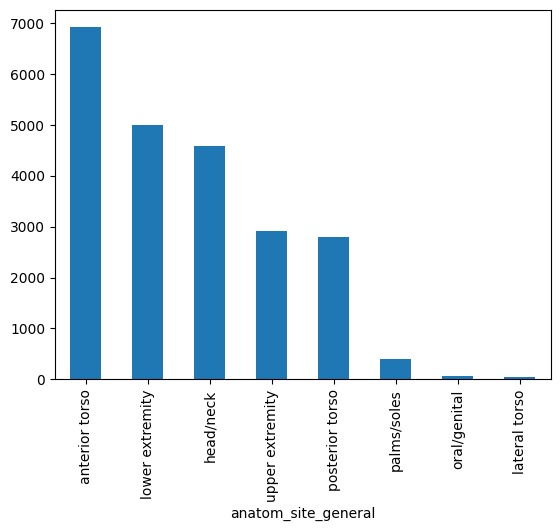

In [ ]:
df['anatom_site_general'].value_counts().plot(kind='bar')

<Axes: >

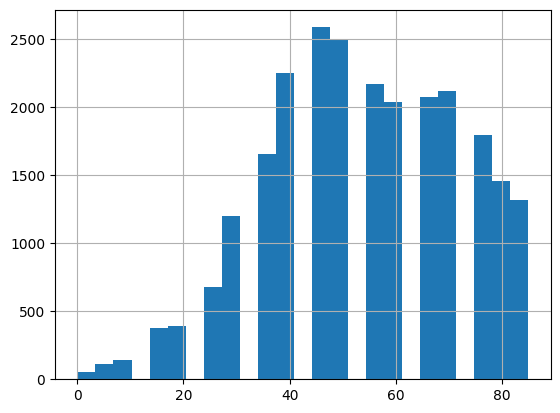

In [ ]:
df['age_approx'].hist(bins=25)

<Axes: xlabel='sex'>

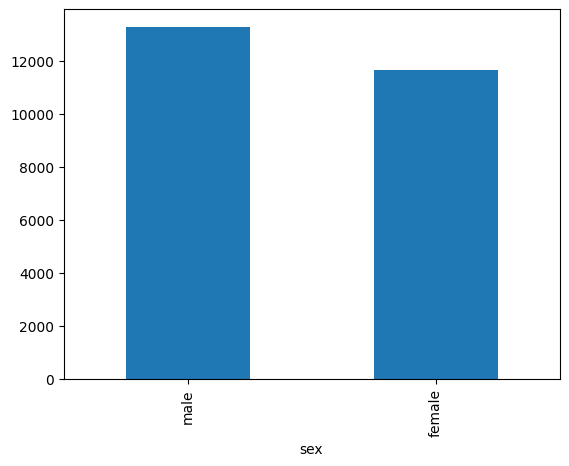

In [ ]:
df['sex'].value_counts().plot(kind='bar')

In [ ]:
#Quantidade de imagens de cada categoria
import pandas as pd

# Caminho para o arquivo CSV com os rótulos
CSV_PATH = '/content/ISIC_data/ISIC_2019_Training_GroundTruth.csv'

# Carregar o CSV
df_ground_truth = pd.read_csv(CSV_PATH)

# Contar quantos valores 1 existem em cada coluna
counts = df_ground_truth.sum()

# Exibir o resultado
print("Quantidade de imagens de cada categoria:")
print(counts)

Quantidade de imagens de cada categoria:
image    ISIC_0000000ISIC_0000001ISIC_0000002ISIC_00000...
MEL                                                 4522.0
NV                                                 12875.0
BCC                                                 3323.0
AK                                                   867.0
BKL                                                 2624.0
DF                                                   239.0
VASC                                                 253.0
SCC                                                  628.0
UNK                                                    0.0
dtype: object


In [ ]:
#Quantidade de imagens Malignas e Benignas
import pandas as pd

csv_path = "/content/ISIC_data/ISIC_2019_Training_GroundTruth.csv"

df = pd.read_csv(csv_path)

lesoes_malignas = ['MEL', 'BCC', 'AK', 'SCC']
lesoes_benignas = ['NV', 'BKL', 'DF', 'VASC']

total_malignas = df[lesoes_malignas].sum().sum()
total_benignas = df[lesoes_benignas].sum().sum()

print(f"Quantidade total de lesões malignas: {total_malignas}")
print(f"Quantidade total de lesões benignas: {total_benignas}")

Quantidade total de lesões malignas: 9340.0
Quantidade total de lesões benignas: 15991.0


**Lesões** <br>

Malignas e Benignas
*   'Malignas': 9340
*   'Benignas': 15991

Categoria das lesões
*   'Basal cell carcinoma': 3323
*   'Dermatofibroma': 239
*   'Vascular lesion': 253
*   'Melanoma': 4522
*   'Melanocytic nevus': 12875
*   'Actinic keratosis': 867
*   'Benign keratosis': 2624
*   'Squamous cell carcinoma': 628



**Gráficos**

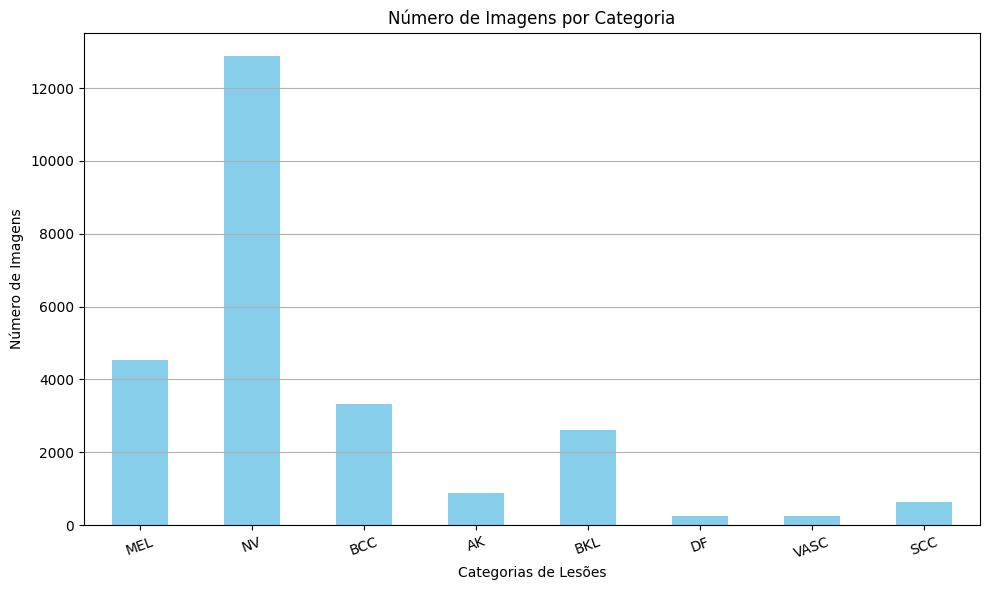

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

csv_path = '/content/ISIC_data/ISIC_2019_Training_GroundTruth.csv'
data = pd.read_csv(csv_path)

category_counts = data[['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC']].sum()

# gráfico de barras
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Número de Imagens por Categoria')
plt.xlabel('Categorias de Lesões')
plt.ylabel('Número de Imagens')
plt.xticks(rotation=20)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


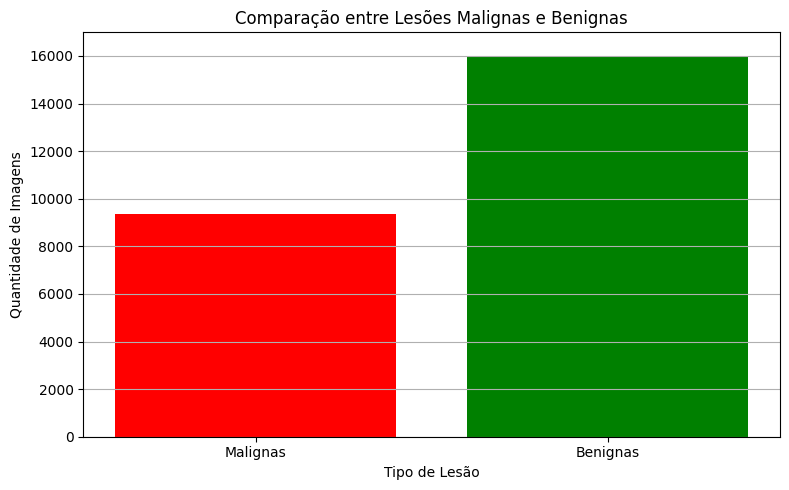

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

csv_path = "/content/ISIC_data/ISIC_2019_Training_GroundTruth.csv"

df = pd.read_csv(csv_path)

labels = ['Malignas', 'Benignas']
totais = [total_malignas, total_benignas]

plt.figure(figsize=(8, 5))
plt.bar(labels, totais, color=['red', 'green'])
plt.title('Comparação entre Lesões Malignas e Benignas')
plt.xlabel('Tipo de Lesão')
plt.ylabel('Quantidade de Imagens')
plt.ylim(0, max(totais) + 1000)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Distribuição das imagens: <br>
Com base nos resultados obtidos, podemos inferir que temos um conjunto de dados desbalanceado uma vez que a categoria "Melanocytic Nevus" (12.875), por exemplo, tem o número mais significativo de imagens em comparação com as outras, como "Dermatofibroma" (239) e a classe "Vascular lesion" (253). O desbalanceamento pode causar enviesamento no modelo aplicado para classificação das imagens.<br>Tal desbalanceamento também é evidenciado quando se trata da comparação entre as imagens Malignas e Benignas presentes no dataset.








- Benignas e Malignas

**Análise de sanidade dos dados**

In [ ]:
from pathlib import Path
from PIL import Image
from collections import Counter

class SanityChecks:
    def __init__(self, path: Path) -> None:
        self.path = path
        self.files_list = self.__get_path_list()
        self.mode_types = []
        self.width = []
        self.height = []

    def __get_path_list(self) -> list:
        # Filtra os arquivos para excluir LICENSE.txt e ATTRIBUTION.txt
        files_path_gen = self.path.glob("*.*")
        return [file for file in files_path_gen if file.name not in ['LICENSE.txt', 'ATTRIBUTION.txt']]

    def check_corruption(self) -> dict:
        error = []
        for file in self.files_list:
            try:
                img = Image.open(file)
                self.mode_types.append(img.mode)
                self.width.append(img.width)
                self.height.append(img.height)
            except:
                error.append(file)
        return {"qt_errors": len(error), "files_erros": error}

    def check_typing(self) -> dict:
        print(self.files_list[0])
        ext = [str(file).split(".")[-1] for file in self.files_list]
        return {
            "ext": list(set(ext))
        }

    def check_mode(self) -> dict:
        for file in self.files_list:
            try:
                with Image.open(file) as img:
                    self.mode_types.append(img.mode)
            except Exception as e:
                print(f"Erro ao processar {file}: {e}")

        return {
            "modes": list(set(self.mode_types))
        }

    def check_image_size(self) -> dict:
        image_sizes = []
        for file in self.files_list:
            try:
                with Image.open(file) as img:
                    width, height = img.size
                    image_sizes.append((file.name, width, height))
            except Exception as e:
                print(f"Erro ao abrir {file.name}: {e}")
        summary_sizes = Counter((width, height) for _, width, height in image_sizes)
        return {"summary_sizes": dict(summary_sizes)}


In [ ]:
IMG_PATH = Path('/content/ISIC_data/ISIC_2019_Training_Input/ISIC_2019_Training_Input')
sanity_checks = SanityChecks(IMG_PATH)
print(sanity_checks.check_corruption())  # Verifica corrupção de imagens
print(sanity_checks.check_typing())      # Verifica as extensões
print(sanity_checks.check_mode())      # Verifica os modos das imagens
print(sanity_checks.check_image_size())  # Verifica as dimensões das imagens


{'qt_errors': 0, 'files_erros': []}
/content/ISIC_data/ISIC_Organizado/Malignas/ISIC_0055293.jpg
{'ext': ['jpg']}
{'modes': ['RGB']}
{'summary_sizes': {(1024, 1024): 6835, (600, 450): 1954, (1024, 684): 9, (1024, 768): 175, (1024, 682): 10, (1024, 681): 16, (1022, 767): 4, (824, 719): 4, (1024, 680): 229, (1024, 683): 6, (722, 542): 3, (1024, 685): 16, (1024, 677): 9, (722, 545): 1, (833, 680): 1, (919, 802): 12, (1024, 679): 11, (1024, 878): 1, (767, 576): 14, (964, 640): 1, (722, 540): 1, (965, 624): 1, (1024, 678): 2, (965, 724): 1, (838, 614): 1, (1024, 688): 1, (679, 566): 1, (1016, 682): 1, (963, 629): 1, (959, 638): 1, (1024, 687): 1, (960, 724): 1, (1024, 686): 1, (964, 720): 1, (1024, 769): 1, (1024, 674): 3, (1024, 861): 1, (771, 750): 1, (1024, 689): 1, (965, 649): 1, (966, 638): 1, (961, 649): 1, (962, 674): 2, (639, 602): 1, (857, 1024): 1}}


Resultados

*   Arquivos corrompidos: Nenhum <br>
Todos os arquivos de imagem são válidos, com isso, não há problemas de corrupção.
*   Extensão: jpg <br>
As imagens são todas no formato JPG, dessa forma não a necessidade de lidar com múltiplos formatos.
*   Altura e Largura: Diversificada <br>
As dimensões das imagens variam bastante. Sendo assim, é necessário redimensionar para que tenham a mesma altura e largura, e assim facilitar o processo.
*   Modo: RGB <br>
As imagens estão em RGB, ou seja, são imagens coloridas e com três canais de cor. A maioria dos modelos esperam imagens coloridas como entrada.


# Preparação dos dados

**Separação de imagens por categoria**

In [ ]:
import os
import shutil
import pandas as pd

# Caminhos do CSV e das imagens
csv_path = "/content/ISIC_data/ISIC_2019_Training_GroundTruth.csv"
imagens_dir = "/content/ISIC_data/ISIC_2019_Training_Input/ISIC_2019_Training_Input"
novo_diretorio = "/content/ISIC_data/ISIC_Organizado"

# Ler o arquivo CSV
df = pd.read_csv(csv_path)

# Definir classes de lesões
lesoes_malignas = ['MEL', 'BCC', 'AK', 'SCC']
lesoes_benignas = ['NV', 'BKL', 'DF', 'VASC']

# Criar os novos diretórios
os.makedirs(os.path.join(novo_diretorio, "Malignas"), exist_ok=True)
os.makedirs(os.path.join(novo_diretorio, "Benignas"), exist_ok=True)

# Mover as imagens para os diretórios correspondentes
for _, row in df.iterrows():
    imagem_id = row['image']  # Coluna com o ID da imagem
    caminho_imagem = os.path.join(imagens_dir, f"{imagem_id}.jpg")

    # Verificar se a imagem é maligna ou benigna
    if row[lesoes_malignas].sum() > 0:
        destino = os.path.join(novo_diretorio, "Malignas", f"{imagem_id}.jpg")
    elif row[lesoes_benignas].sum() > 0:
        destino = os.path.join(novo_diretorio, "Benignas", f"{imagem_id}.jpg")
    else:
        continue

    if os.path.exists(caminho_imagem):
        shutil.move(caminho_imagem, destino)
    else:
        print(f"Imagem não encontrada: {caminho_imagem}")

print("Imagens organizadas com sucesso!")


Imagens organizadas com sucesso!


In [ ]:
#Check Imagens
import os

base_path = "/content/ISIC_data/ISIC_Organizado"

categorias = [
    "Benignas",
    "Malignas"
]

# Quantidade de imagem de cada pasta
for categoria in categorias:
    categoria_path = os.path.join(base_path, categoria)
    if os.path.exists(categoria_path):
        num_imagens = len([f for f in os.listdir(categoria_path) if os.path.isfile(os.path.join(categoria_path, f))])
        print(f"{categoria}: {num_imagens} imagens")
    else:
        print(f"Pasta não encontrada: {categoria}")


Benignas: 15991 imagens
Malignas: 9340 imagens


**Redimensionar imagens e Normalização**

- 448x448

In [ ]:
import os
import logging
from concurrent.futures import ThreadPoolExecutor
from PIL import Image, ImageOps

# Configuração de logs
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

base_path = "/content/ISIC_data/ISIC_Organizado"
output_directory = "/content/ISIC_data/ISIC_Processed_Images"

# Tamanho de imagem e dimensões alvo
image_size = 448
target_dimensions = (image_size, image_size)
valid_extensions = (".jpg", ".jpeg", ".png")

# Listagem das categorias (nomes das pastas com as imagens)
categorias = [
    "Benignas",
    "Malignas"
]


def is_valid_image(file_path):
    "Verifica se o arquivo é uma imagem válida."
    return os.path.isfile(file_path) and file_path.lower().endswith(valid_extensions)

def add_padding(image, target_size):
    "Adiciona padding para tornar a imagem quadrada."
    width, height = image.size
    pad_width = max(0, target_size[0] - width)
    pad_height = max(0, target_size[1] - height)
    pad_left = pad_width // 2
    pad_top = pad_height // 2
    pad_right = pad_width - pad_left
    pad_bottom = pad_height - pad_top
    return ImageOps.expand(image, (pad_left, pad_top, pad_right, pad_bottom), (255, 255, 255))

def process_single_image(file_path, output_subdir, filename):
    try:
        with Image.open(file_path) as original_image:
            original_image = original_image.convert("RGB")
            if original_image.size[0] != original_image.size[1]:
                original_image = add_padding(original_image, target_dimensions)
            resized_image = original_image.resize(target_dimensions)
            output_path = os.path.join(output_subdir, filename)
            resized_image.save(output_path)
            logging.info(f"Imagem '{filename}' processada e salva em '{output_subdir}'.")
    except (OSError, IOError) as e:
        logging.error(f"Erro ao processar '{filename}': {e}")

def process_images():
    with ThreadPoolExecutor(max_workers=4) as executor:
        for category in categorias:
            category_path = os.path.join(base_path, category)
            if os.path.isdir(category_path):
                for filename in os.listdir(category_path):
                    file_path = os.path.join(category_path, filename)
                    if is_valid_image(file_path):
                        output_subdir = os.path.join(output_directory, category)
                        os.makedirs(output_subdir, exist_ok=True)
                        processed_file_path = os.path.join(output_subdir, filename)
                        if not os.path.exists(processed_file_path):
                            executor.submit(process_single_image, file_path, output_subdir, filename)
                        else:
                            logging.info(f"'{filename}' já foi processado. Ignorando.")

    logging.info("Processamento completo.")

if __name__ == "__main__":
    os.makedirs(output_directory, exist_ok=True)
    process_images()


In [ ]:
IMG_PATH = Path('/content/ISIC_data/ISIC_Processed_Images/Benignas')
sanity_checks = SanityChecks(IMG_PATH)
print(sanity_checks.check_image_size())  # Verifica as dimensões das imagens

{'summary_sizes': {(448, 448): 15991}}


In [ ]:
IMG_PATH = Path('/content/ISIC_data/ISIC_Processed_Images/Malignas')
sanity_checks = SanityChecks(IMG_PATH)
print(sanity_checks.check_image_size())  # Verifica as dimensões das imagens

{'summary_sizes': {(448, 448): 9340}}


In [ ]:
pip install pillow

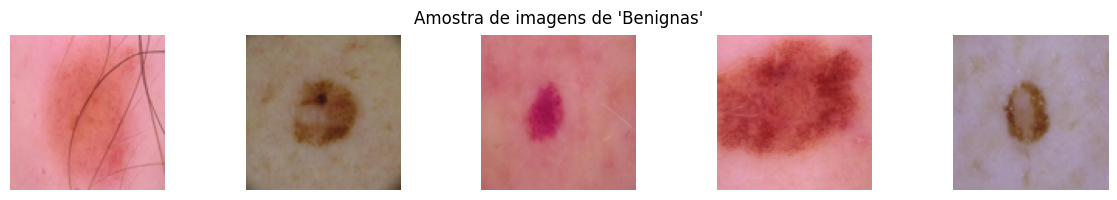

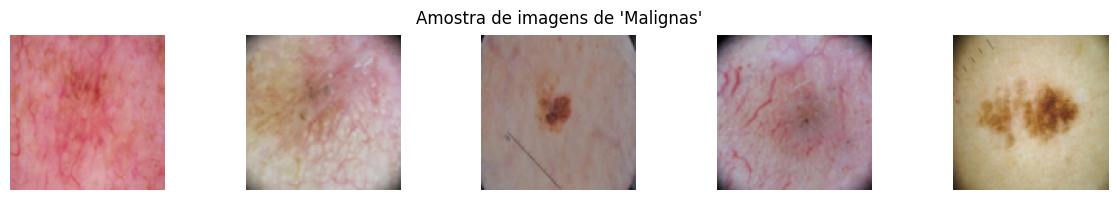

In [ ]:
import math
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def plot_images(path: Path, sample_size: int):
    files_path_gen = path.glob("*.*")
    files = [file for file in files_path_gen]

    sample = np.random.choice(files, sample_size)

    plt.figure(figsize=(12, 2))
    plt.suptitle(f"Amostra de imagens de '{path.name}'", fontsize=12)

    for i, file in enumerate(sample):
        img = Image.open(file)
        img = img.resize((100, 100))
        plt.subplot(1, sample_size, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

base_path = Path("/content/ISIC_data/ISIC_Processed_Images")

categorias = [
    "Benignas",
    "Malignas"
]

# Para cada categoria, gerar uma amostra de 5 imagens
for categoria in categorias:
    categoria_path = base_path / categoria
    if categoria_path.exists() and categoria_path.is_dir():
        plot_images(categoria_path, sample_size=5)
    else:
        print(f"A categoria '{categoria}' não foi encontrada.")


**Data Argumentation**

Devido ao desbalanceamento dos dados será aplicado um processo de data argumentation para aumentar a quantidade de dados das categorias de imagens com menos quantidade de dados.

In [ ]:
import os
import numpy as np
from pathlib import Path
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

TARGET_SIZE = (448, 448)
AUGMENTATION_PARAMS = {
    "rescale": 1.0 / 255.0,
    "rotation_range": 180,
    "width_shift_range": 0.1,
    "height_shift_range": 0.1,
    "zoom_range": 0.1,
    "horizontal_flip": True,
    "vertical_flip": True,
    "brightness_range": [0.45, 0.55],
    "fill_mode": "reflect"
}

def augment_images(category_path: Path, category: str, output_category_path: Path, num_new_images: int):
    """
    Aplica Data Augmentation nas imagens de uma categoria e salva as novas imagens geradas.
    """
    os.makedirs(output_category_path, exist_ok=True)
    datagen = ImageDataGenerator(**AUGMENTATION_PARAMS)

    files = list(category_path.glob("*.*"))
    if not files:
        logging.warning(f"Nenhuma imagem encontrada na categoria '{category}'.")
        return

    count = 0
    for file in files:
        if count >= num_new_images:
            break
        try:
            img = Image.open(file).convert('RGB')  # Converte para RGB
            img = img.resize(TARGET_SIZE)  # Redimensiona
        except Exception as e:
            logging.warning(f"Erro ao abrir a imagem {file.name}: {e}")
            continue

        img_array = np.expand_dims(np.array(img), axis=0)

        # Gera novas imagens
        for i, _ in enumerate(datagen.flow(img_array, batch_size=1, save_to_dir=str(output_category_path),
                                           save_prefix=file.stem, save_format='jpg')):

            count += 1
            if count >= num_new_images:
                break
            if i >= 20:
                break

    logging.info(f"Data augmentation para a categoria '{category}' concluído. {count} novas imagens geradas.")

def apply_augmentation(base_path: str, output_base_path: str, categories: dict):
    for category, num_images in categories.items():
        category_path = Path(base_path) / category
        if category_path.exists() and category_path.is_dir():
            output_category_path = Path(output_base_path) / category
            augment_images(category_path, category, output_category_path, num_new_images=num_images)
        else:
            logging.warning(f"A categoria '{category}' não foi encontrada no diretório {base_path}.")

base_path = "/content/ISIC_data/ISIC_Organizado"
output_base_path = "/content/ISIC_data/ISIC_Organizado_Expanded"

# Quantidades específicas de imagens para cada categoria
categories = {
    "Benignas": 0,
    "Malignas": 6651
}

apply_augmentation(base_path, output_base_path, categories)


In [ ]:
import os

base_path = "/content/ISIC_data/ISIC_Organizado_Expanded"


categorias = [
    "Benignas",
    "Malignas"
]

# Quantidade de imagem de cada pasta
for categoria in categorias:
    categoria_path = os.path.join(base_path, categoria)
    if os.path.exists(categoria_path):
        num_imagens = len([f for f in os.listdir(categoria_path) if os.path.isfile(os.path.join(categoria_path, f))])
        print(f"{categoria}: {num_imagens} imagens")
    else:
        print(f"Pasta não encontrada: {categoria}")

Benignas: 0 imagens
Malignas: 6646 imagens


<Figure size 1200x200 with 0 Axes>

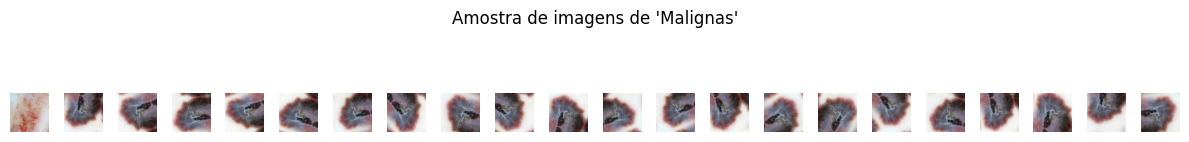

In [ ]:
import math
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def plot_images(path: Path, sample_size: int):
    files_path_gen = path.glob("*.*")
    files = sorted([file for file in files_path_gen], key=lambda x: x.name)

    sample = files[-sample_size:]

    plt.figure(figsize=(12, 2))
    plt.suptitle(f"Amostra de imagens de '{path.name}'", fontsize=12)

    for i, file in enumerate(sample):
        img = Image.open(file)
        img = img.resize((100, 100))
        plt.subplot(1, sample_size, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

base_path = Path("/content/ISIC_data/ISIC_Organizado_Expanded")

# Lista de categorias
categorias = [
    "Benignas",
    "Malignas"
]

for categoria in categorias:
    categoria_path = base_path / categoria
    if categoria_path.exists() and categoria_path.is_dir():
        plot_images(categoria_path, sample_size=22)
    else:
        print(f"A categoria '{categoria}' não foi encontrada.")


Agrupamento de imagens

In [ ]:
import os
import shutil
from pathlib import Path

# Origem
base_path = Path("/content/ISIC_data/ISIC_Organizado")
base_path_expanded = Path("/content/ISIC_data/ISIC_Organizado_Expanded")

# Destino
new_base_path = Path("/content/ISIC_data/ISIC_Processed_Images_Merged")
new_base_path.mkdir(parents=True, exist_ok=True)

categorias = [
    "Benignas",
    "Malignas"
]



def merge_images(categorias, base_path, base_path_expanded, new_base_path):
    for categoria in categorias:
        categoria_path = base_path / categoria
        categoria_path_expanded = base_path_expanded / categoria

        categoria_dest_path = new_base_path / categoria
        categoria_dest_path.mkdir(parents=True, exist_ok=True)

        if categoria_path.exists():
            for file in os.listdir(categoria_path):
                file_path = categoria_path / file
                if os.path.isfile(file_path):
                    shutil.move(str(file_path), str(categoria_dest_path / file))

        if categoria_path_expanded.exists():
            for file in os.listdir(categoria_path_expanded):
                file_path = categoria_path_expanded / file
                if os.path.isfile(file_path):
                    shutil.move(str(file_path), str(categoria_dest_path / file))

merge_images(categorias, base_path, base_path_expanded, new_base_path)

print("Imagens combinadas com sucesso!")

Imagens combinadas com sucesso!


In [ ]:
import os

base_path = "/content/ISIC_data/ISIC_Processed_Images_Merged"


categorias = [
    "Benignas",
    "Malignas"
]

# Quantidade de imagem de cada pasta
for categoria in categorias:
    categoria_path = os.path.join(base_path, categoria)
    if os.path.exists(categoria_path):
        num_imagens = len([f for f in os.listdir(categoria_path) if os.path.isfile(os.path.join(categoria_path, f))])
        print(f"{categoria}: {num_imagens} imagens")
    else:
        print(f"Pasta não encontrada: {categoria}")

Benignas: 15991 imagens
Malignas: 15986 imagens


# Modelos

In [ ]:
!pip install tensorflow

*1º* EfficientNetB0

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.metrics import MeanSquaredError
import matplotlib.pyplot as plt


base_dir = "/content/ISIC_data/ISIC_Processed_Images_Merged"
output_dir = "/content/ISIC_data/Processed_Split"

train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "validation")
test_dir = os.path.join(output_dir, "test")

for category in ['Benignas', 'Malignas']:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

# Dividir os dados
for category in ['Benignas', 'Malignas']:
    category_dir = os.path.join(base_dir, category)
    images = os.listdir(category_dir)

    train_images, temp_images = train_test_split(images, test_size=0.25, random_state=42)  # 75% treino
    val_images, test_images = train_test_split(temp_images, test_size=0.4, random_state=42)  # 15% validação, 10% teste

    for img in train_images:
        shutil.copy(os.path.join(category_dir, img), os.path.join(train_dir, category, img))
    for img in val_images:
        shutil.copy(os.path.join(category_dir, img), os.path.join(val_dir, category, img))
    for img in test_images:
        shutil.copy(os.path.join(category_dir, img), os.path.join(test_dir, category, img))

# Geradores de dados
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(448, 448),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(448, 448),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(448, 448),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(448, 448, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy', MeanSquaredError()]
)

callbacks = [
    ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_loss"),
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
]

model.summary()


Found 23981 images belonging to 2 classes.
Found 4796 images belonging to 2 classes.
Found 3199 images belonging to 2 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 448, 448, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 448, 448, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 448, 448, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 448, 448, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 449, 449, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 224, 224, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 224, 224, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 224, 224, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 224, 224, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 224, 224, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 224, 224, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 4,378,021 (16.70 MB)

 Trainable params: 328,450 (1.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

-------

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


750/750 ━━━━━━━━━━━━━━━━━━━━ 360s 436ms/step - accuracy: 0.6753 - loss: 0.5984 - mean_squared_error: 0.2062 - val_accuracy: 0.8065 - val_loss: 0.4193 - val_mean_squared_error: 0.1352
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 292s 386ms/step - accuracy: 0.7711 - loss: 0.4659 - mean_squared_error: 0.1532 - val_accuracy: 0.8123 - val_loss: 0.4030 - val_mean_squared_error: 0.1300
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 292s 386ms/step - accuracy: 0.7807 - loss: 0.4515 - mean_squared_error: 0.1487 - val_accuracy: 0.8155 - val_loss: 0.4017 - val_mean_squared_error: 0.1296
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 298s 394ms/step - accuracy: 0.7817 - loss: 0.4432 - mean_squared_error: 0.1459 - val_accuracy: 0.8186 - val_loss: 0.3891 - val_mean_squared_error: 0.1260
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 295s 391ms/step - accuracy: 0.7878 - loss: 0.4370 - mean_squared_error: 0.1442 - val_accuracy: 0.8186 - val_loss: 0.3837 - val_mean_squared_error: 0.1242
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2

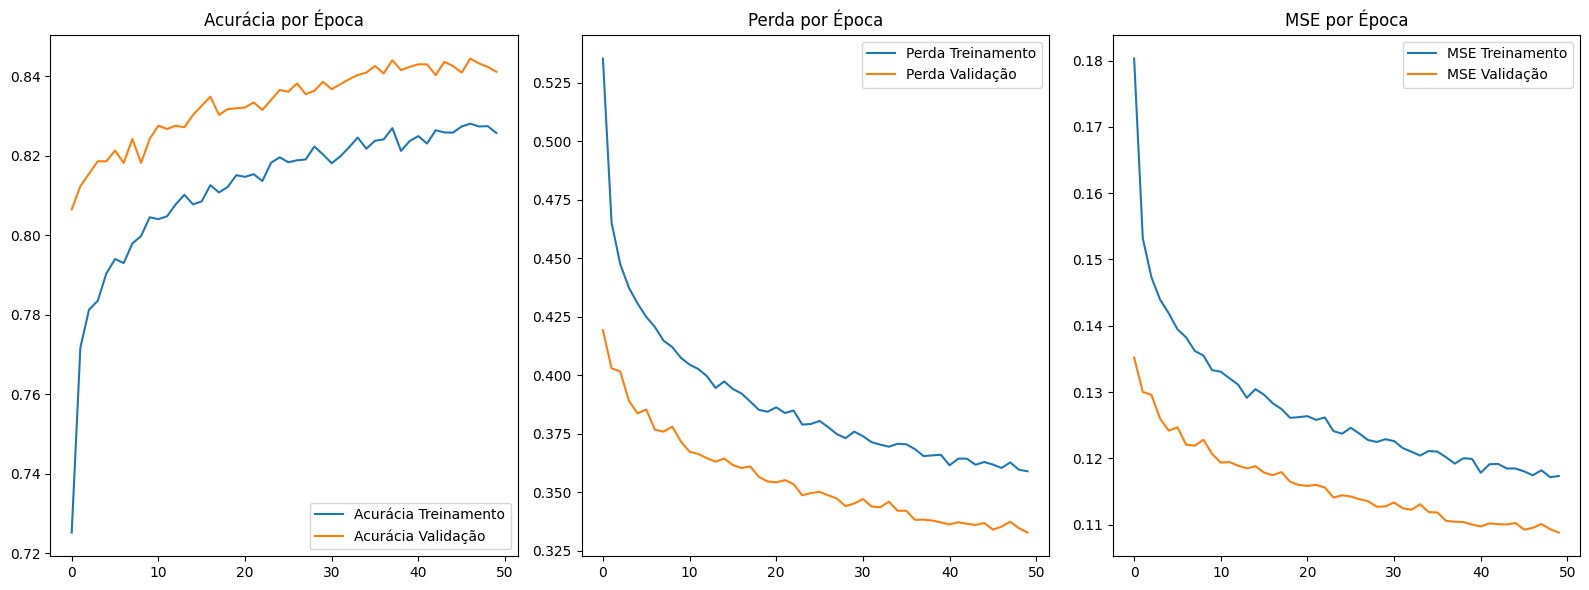

In [ ]:
import matplotlib.pyplot as plt

# Treinando o modelo
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks
)

def plot_history(history):
    acc = history.history.get('accuracy', [])  # Acurácia no treinamento
    val_acc = history.history.get('val_accuracy', [])  # Acurácia na validação
    loss = history.history.get('loss', [])  # Perda no treinamento
    val_loss = history.history.get('val_loss', [])  # Perda na validação

    mse = history.history.get('mean_squared_error', [])  # MSE no treinamento
    val_mse = history.history.get('val_mean_squared_error', [])  # MSE na validação

    epochs_range = range(len(acc))  # Intervalo de épocas

    # Plotando as métricas
    plt.figure(figsize=(16, 6))

    # Acurácia
    plt.subplot(1, 3, 1)
    plt.plot(epochs_range, acc, label='Acurácia Treinamento')
    plt.plot(epochs_range, val_acc, label='Acurácia Validação')
    plt.legend(loc='lower right')
    plt.title('Acurácia por Época')

    # Perda
    plt.subplot(1, 3, 2)
    plt.plot(epochs_range, loss, label='Perda Treinamento')
    plt.plot(epochs_range, val_loss, label='Perda Validação')
    plt.legend(loc='upper right')
    plt.title('Perda por Época')

    # Mean Squared Error
    if mse:  # Verifica se o MSE foi calculado
        plt.subplot(1, 3, 3)
        plt.plot(epochs_range, mse, label='MSE Treinamento')
        plt.plot(epochs_range, val_mse, label='MSE Validação')
        plt.legend(loc='upper right')
        plt.title('MSE por Época')

    plt.tight_layout()
    plt.show()

# Plotando o histórico após o treinamento
plot_history(history)


In [ ]:
pip install scikit-learn seaborn

150/150 ━━━━━━━━━━━━━━━━━━━━ 62s 371ms/step


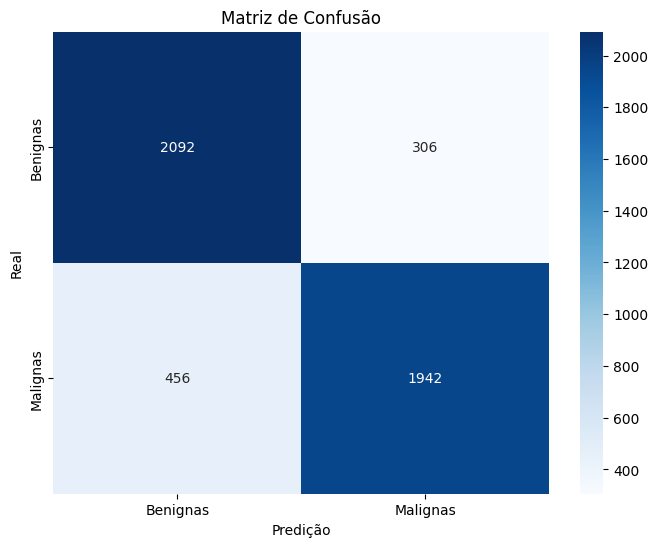

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Após o treinamento, faça as previsões no conjunto de validação
validation_labels = validation_generator.classes  # Rótulos reais
validation_predictions = model.predict(validation_generator)  # Previsões do modelo
predicted_classes = np.argmax(validation_predictions, axis=1)  # Índices das classes previstas

# Gerando a matriz de confusão
conf_matrix = confusion_matrix(validation_labels, predicted_classes)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Calculando as previsões do modelo para o conjunto de teste
test_generator.reset()  # Reseta o gerador
predictions = model.predict(test_generator, verbose=1)

# Obtendo as classes previstas
predicted_classes = np.argmax(predictions, axis=1)

# Obtendo as classes reais a partir do gerador de testes
true_classes = test_generator.classes

# Gerando o relatório de métricas
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 474ms/step
              precision    recall  f1-score   support

    Benignas       0.83      0.88      0.85      1600
    Malignas       0.87      0.82      0.84      1599

    accuracy                           0.85      3199
   macro avg       0.85      0.85      0.85      3199
weighted avg       0.85      0.85      0.85      3199



100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 319ms/step


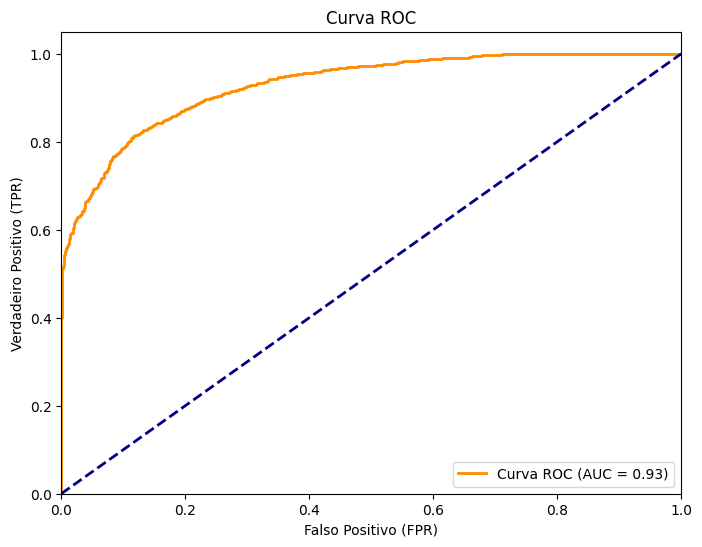

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Fazendo previsões no conjunto de teste
test_generator.reset()  # Reseta o gerador para garantir que os dados sejam lidos corretamente
predictions = model.predict(test_generator, verbose=1)

# Para classificação binária, pegamos a probabilidade da classe positiva
# Para problemas com mais de 2 classes, você pode modificar isso para uma classe específica
# Aqui, para problemas binários, pegamos a probabilidade para a classe '1' (Maligna)
y_true = test_generator.classes  # Classes reais
y_pred = predictions[:, 1]  # Probabilidades para a classe positiva (Malignas)

# Calculando FPR e TPR para diferentes limiares
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Calculando a AUC (Área Sob a Curva)
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Linha de aleatoriedade
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo (FPR)')
plt.ylabel('Verdadeiro Positivo (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculando precisão, revocação e F1-score manualmente
precision = precision_score(true_classes, predicted_classes, average='weighted')  # Média ponderada
recall = recall_score(true_classes, predicted_classes, average='weighted')  # Média ponderada
f1 = f1_score(true_classes, predicted_classes, average='weighted')  # Média ponderada

print(f"Precisão: {precision:.2f}")
print(f"Revocação: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precisão: 0.85
Revocação: 0.85
F1-Score: 0.85


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model

# Carregar o modelo completo salvo com a extensão .keras
model.save('/content/drive/MyDrive/my_model.keras')




---



---



---



---



2º VGG16

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt

base_dir = "/content/ISIC_data/ISIC_Processed_Images_Merged"
output_dir = "/content/ISIC_data/Processed_Split"

# Definir os diretórios para treino, validação e teste
train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "validation")
test_dir = os.path.join(output_dir, "test")

# Criar as pastas para cada categoria dentro de treino, validação e teste
for category in ['Benignas', 'Malignas']:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

# Dividir os dados em treino (75%), validação (15%) e teste (10%)
for category in ['Benignas', 'Malignas']:
    category_dir = os.path.join(base_dir, category)
    images = os.listdir(category_dir)

    # Dividir em treino e teste+validação
    train_images, temp_images = train_test_split(images, test_size=0.25, random_state=42)
    # Dividir o conjunto temp_images em validação e teste
    val_images, test_images = train_test_split(temp_images, test_size=0.4, random_state=42)  # 15% validação, 10% teste

    # Copiar as imagens para os diretórios correspondentes
    for img in train_images:
        shutil.copy(os.path.join(category_dir, img), os.path.join(train_dir, category, img))
    for img in val_images:
        shutil.copy(os.path.join(category_dir, img), os.path.join(val_dir, category, img))
    for img in test_images:
        shutil.copy(os.path.join(category_dir, img), os.path.join(test_dir, category, img))

# Geradores de dados com imagens redimensionadas e tamanho de batch reduzido
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
val_test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

# Alterado o tamanho da imagem para (224, 224) e reduzido o batch_size para 16
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Alterado de (448, 448) para (224, 224)
    batch_size=16,  # Tamanho do batch reduzido
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),  # Alterado de (448, 448) para (224, 224)
    batch_size=16,  # Tamanho do batch reduzido
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Alterado de (448, 448) para (224, 224)
    batch_size=16,  # Tamanho do batch reduzido
    class_mode='categorical',
    shuffle=False
)

# Criar e compilar o modelo VGG16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import mixed_precision

# Ativar precisão mista (mixed precision)
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Carregar o modelo VGG16 sem as camadas superiores (include_top=False)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar as camadas do modelo base
for layer in base_model.layers:
    layer.trainable = False

# Adicionar camadas customizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)  # Número de classes

# Criar o modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar o modelo
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy', MeanSquaredError()]
)

# Resumo do modelo
model.summary()

# Definir os callbacks
callbacks = [
    ModelCheckpoint("best_model_vgg16.keras", save_best_only=True, monitor="val_loss"),
    EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True)
]


Found 23983 images belonging to 2 classes.
Found 4796 images belonging to 2 classes.
Found 3199 images belonging to 2 classes.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cast (Cast)                          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │              

 Total params: 14,846,530 (56.64 MB)

 Trainable params: 131,842 (515.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/50
1499/1499 ━━━━━━━━━━━━━━━━━━━━ 212s 141ms/step - accuracy: 0.7984 - loss: 0.4234 - mean_squared_error: 0.1379 - val_accuracy: 0.8155 - val_loss: 0.4052 - val_mean_squared_error: 0.1307
Epoch 2/50
1499/1499 ━━━━━━━━━━━━━━━━━━━━ 214s 142ms/step - accuracy: 0.8027 - loss: 0.4161 - mean_squared_error: 0.1356 - val_accuracy: 0.8165 - val_loss: 0.4003 - val_mean_squared_error: 0.1289
Epoch 3/50
1499/1499 ━━━━━━━━━━━━━━━━━━━━ 215s 143ms/step - accuracy: 0.7972 - loss: 0.4231 - mean_squared_error: 0.1382 - val_accuracy: 0.8226 - val_loss: 0.3945 - val_mean_squared_error: 0.1270
Epoch 4/50
1499/1499 ━━━━━━━━━━━━━━━━━━━━ 219s 145ms/step - accuracy: 0.8013 - loss: 0.4229 - mean_squared_error: 0.1379 - val_accuracy: 0.8209 - val_loss: 0.3976 - val_mean_squared_error: 0.1279
Epoch 5/50
1499/1499 ━━━━━━━━━━━━━━━━━━━━ 220s 146ms/step - accuracy: 0.8003 - loss: 0.4182 - mean_squared_error: 0.1368 - val_accuracy: 0.8176 - val_loss: 0.3976 - val_mean_squared_error: 0.1284
Epoch 6/50
1499/1499

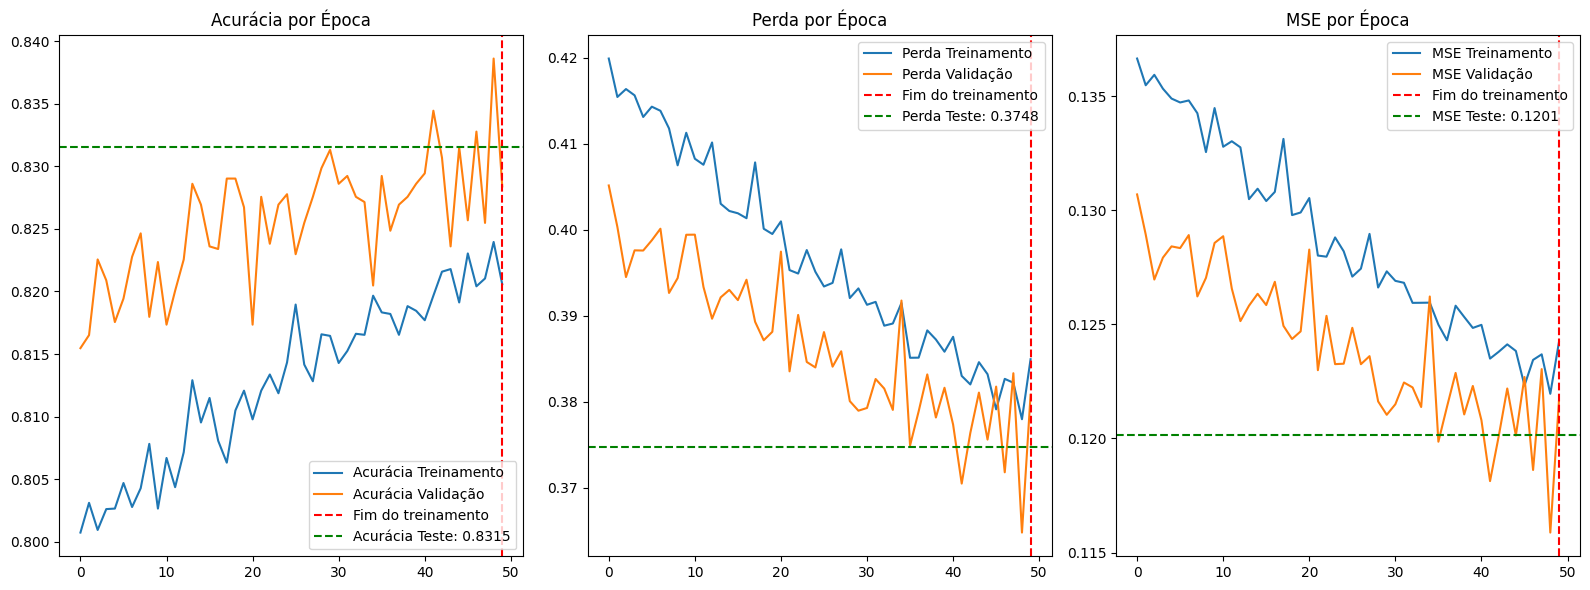

In [ ]:
import matplotlib.pyplot as plt

# Treinar o modelo
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks
)

# Função para plotar o histórico do treinamento
def plot_history(history):
    acc = history.history.get('accuracy', [])  # Acurácia no treinamento
    val_acc = history.history.get('val_accuracy', [])  # Acurácia na validação
    loss = history.history.get('loss', [])  # Perda no treinamento
    val_loss = history.history.get('val_loss', [])  # Perda na validação

    mse = history.history.get('mean_squared_error', [])  # MSE no treinamento
    val_mse = history.history.get('val_mean_squared_error', [])  # MSE na validação

    epochs_range = range(len(acc))  # Intervalo de épocas

    # Plotando as métricas
    plt.figure(figsize=(16, 6))

    # Acurácia
    plt.subplot(1, 3, 1)
    plt.plot(epochs_range, acc, label='Acurácia Treinamento')
    plt.plot(epochs_range, val_acc, label='Acurácia Validação')
    plt.legend(loc='lower right')
    plt.title('Acurácia por Época')

    # Perda
    plt.subplot(1, 3, 2)
    plt.plot(epochs_range, loss, label='Perda Treinamento')
    plt.plot(epochs_range, val_loss, label='Perda Validação')
    plt.legend(loc='upper right')
    plt.title('Perda por Época')

    # Mean Squared Error (MSE)
    if mse:  # Verifica se o MSE foi calculado
        plt.subplot(1, 3, 3)
        plt.plot(epochs_range, mse, label='MSE Treinamento')
        plt.plot(epochs_range, val_mse, label='MSE Validação')
        plt.legend(loc='upper right')
        plt.title('MSE por Época')

    plt.tight_layout()
    plt.show()

# Plotando o histórico após o treinamento
plot_history(history)


200/200 ━━━━━━━━━━━━━━━━━━━━ 27s 130ms/step


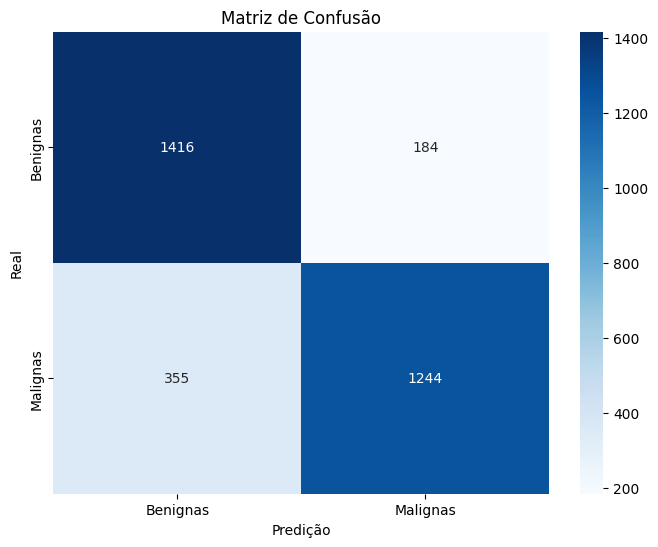

Relatório de Classificação:
              precision    recall  f1-score   support

    Benignas       0.80      0.89      0.84      1600
    Malignas       0.87      0.78      0.82      1599

    accuracy                           0.83      3199
   macro avg       0.84      0.83      0.83      3199
weighted avg       0.84      0.83      0.83      3199

Acurácia: 0.8315
200/200 ━━━━━━━━━━━━━━━━━━━━ 24s 119ms/step


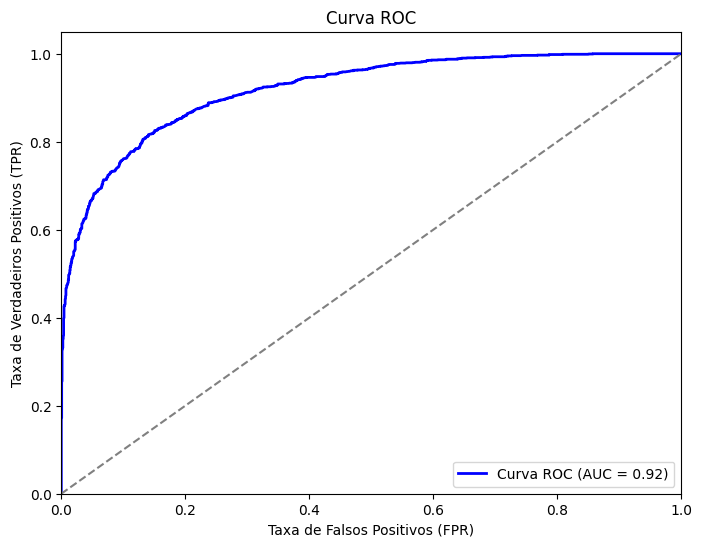

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import seaborn as sns
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model

# Após o treinamento do modelo, vamos gerar as previsões no conjunto de teste
y_true = test_generator.classes  # Rótulos reais
y_pred = model.predict(test_generator)  # Previsões do modelo

# Para calcular as métricas, precisamos de rótulos binários ou multiclasses
y_pred_classes = np.argmax(y_pred, axis=1)  # Índices das classes previstas (para multiclasses)

# 1. Matriz de Confusão
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# 2. Relatório de Classificação (Prec, Revocação, F1-Score)
print("Relatório de Classificação:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# 3. Acurácia
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Acurácia: {accuracy:.4f}")

# 4. Curva ROC e AUC (Área sob a curva)
# Para isso, usamos as probabilidades de cada classe e calculamos a curva ROC
y_pred_prob = model.predict(test_generator)  # Probabilidades das classes (não as classes diretamente)
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob[:, 1])  # Para 2 classes, usar [:, 1] (ou a classe de interesse)
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linha de referência
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model

model_save_path = '/content/drive/MyDrive/meu_modelo_vgg16.keras'
model.save(model_save_path)
print(f"Modelo salvo em: {model_save_path}")

Modelo salvo em: /content/drive/MyDrive/meu_modelo_vgg16.keras


--------------------------------
--------------------------------
--------------------------------
--------------------------------

3º AlexNet

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.metrics import MeanSquaredError
import matplotlib.pyplot as plt

base_dir = "/content/ISIC_data/ISIC_Processed_Images_Merged"
output_dir = "/content/ISIC_data/Processed_Split"

train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "validation")
test_dir = os.path.join(output_dir, "test")

for category in ['Benignas', 'Malignas']:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

# Dividir os dados
for category in ['Benignas', 'Malignas']:
    category_dir = os.path.join(base_dir, category)
    images = os.listdir(category_dir)

    train_images, temp_images = train_test_split(images, test_size=0.25, random_state=42)  # 75% treino
    val_images, test_images = train_test_split(temp_images, test_size=0.4, random_state=42)  # 15% validação, 10% teste

    for img in train_images:
        shutil.copy(os.path.join(category_dir, img), os.path.join(train_dir, category, img))
    for img in val_images:
        shutil.copy(os.path.join(category_dir, img), os.path.join(val_dir, category, img))
    for img in test_images:
        shutil.copy(os.path.join(category_dir, img), os.path.join(test_dir, category, img))

# Geradores de dados
train_datagen = ImageDataGenerator(preprocessing_function=None)  # Não usamos preprocess_input para AlexNet
val_test_datagen = ImageDataGenerator(preprocessing_function=None)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(448, 448),  # Dimensão típica do AlexNet
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(448, 448),  # Dimensão típica do AlexNet
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(448, 448),  # Dimensão típica do AlexNet
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Definição do modelo AlexNet
input_shape = (448, 448, 3)  # Tamanho de entrada para o AlexNet (448x448)

input_layer = Input(shape=input_shape)

# Camadas convolucionais e pooling do AlexNet
x = Conv2D(96, (11, 11), strides=(4, 4), activation='relu')(input_layer)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)
x = Conv2D(256, (5, 5), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)
x = Conv2D(384, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(384, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

# Camada de flatten e totalmente conectada
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=predictions)

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy', MeanSquaredError()]
)

callbacks = [
    ModelCheckpoint("best_alexnet_model.keras", save_best_only=True, monitor="val_loss"),
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
]

model.summary()

Found 23982 images belonging to 2 classes.
Found 4796 images belonging to 2 classes.
Found 3199 images belonging to 2 classes.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 448, 448, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 110, 110, 96)        │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 54, 54, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 54, 54, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 26, 26, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     150,999,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           8,194 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,535,746 (654.36 MB)

 Trainable params: 171,535,746 (654.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


750/750 ━━━━━━━━━━━━━━━━━━━━ 352s 442ms/step - accuracy: 0.5856 - loss: 1.3724 - mean_squared_error: 0.2527 - val_accuracy: 0.6558 - val_loss: 0.6069 - val_mean_squared_error: 0.2117
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 307s 406ms/step - accuracy: 0.6707 - loss: 0.5950 - mean_squared_error: 0.2052 - val_accuracy: 0.7244 - val_loss: 0.5258 - val_mean_squared_error: 0.1788
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 309s 409ms/step - accuracy: 0.7311 - loss: 0.5301 - mean_squared_error: 0.1785 - val_accuracy: 0.7627 - val_loss: 0.4843 - val_mean_squared_error: 0.1611
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 298s 394ms/step - accuracy: 0.7563 - loss: 0.4949 - mean_squared_error: 0.1644 - val_accuracy: 0.7375 - val_loss: 0.5298 - val_mean_squared_error: 0.1759
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 311s 412ms/step - accuracy: 0.7633 - loss: 0.4980 - mean_squared_error: 0.1601 - val_accuracy: 0.7750 - val_loss: 0.4778 - val_mean_squared_error: 0.1576
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━

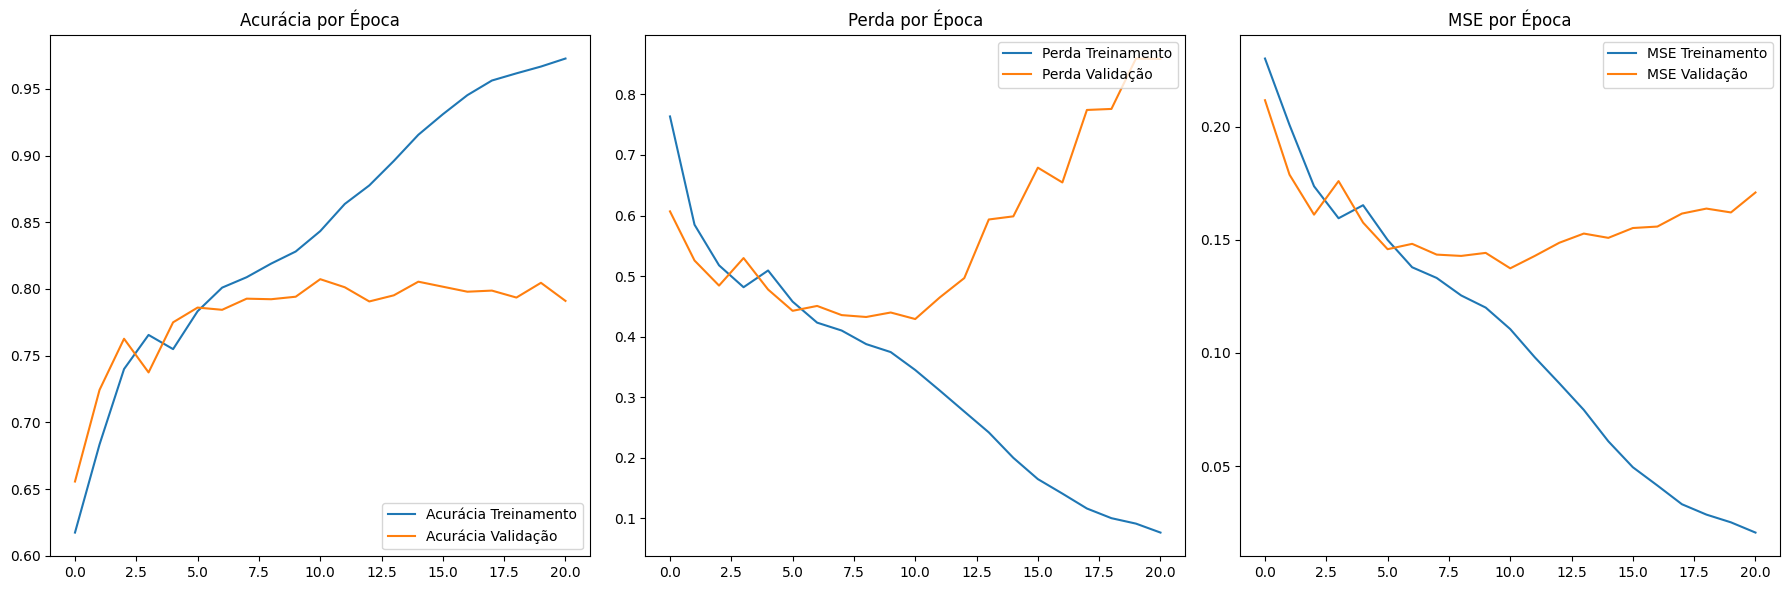

In [ ]:
# Treinando o modelo AlexNet com as novas métricas
history = model.fit(
    train_generator,
    epochs=100,  # Número de épocas
    validation_data=validation_generator,
    callbacks=callbacks
)

# Função para plotar o histórico de treinamento (Acurácia, Perda e MSE)
def plot_history(history):
    # Pegando as métricas do histórico
    acc = history.history.get('accuracy', [])
    val_acc = history.history.get('val_accuracy', [])
    loss = history.history.get('loss', [])
    val_loss = history.history.get('val_loss', [])
    mse = history.history.get('mean_squared_error', [])
    val_mse = history.history.get('val_mean_squared_error', [])

    epochs_range = range(len(acc))

    # Criando o gráfico
    plt.figure(figsize=(18, 6))

    # Acurácia
    plt.subplot(1, 3, 1)
    plt.plot(epochs_range, acc, label='Acurácia Treinamento')
    plt.plot(epochs_range, val_acc, label='Acurácia Validação')
    plt.legend(loc='lower right')
    plt.title('Acurácia por Época')

    # Perda
    plt.subplot(1, 3, 2)
    plt.plot(epochs_range, loss, label='Perda Treinamento')
    plt.plot(epochs_range, val_loss, label='Perda Validação')
    plt.legend(loc='upper right')
    plt.title('Perda por Época')

    # Mean Squared Error (MSE)
    plt.subplot(1, 3, 3)
    plt.plot(epochs_range, mse, label='MSE Treinamento')
    plt.plot(epochs_range, val_mse, label='MSE Validação')
    plt.legend(loc='upper right')
    plt.title('MSE por Época')

    plt.tight_layout()
    plt.show()

# Plotando o histórico após o treinamento
plot_history(history)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import seaborn as sns
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model

# Após o treinamento do modelo, vamos gerar as previsões no conjunto de teste
y_true = test_generator.classes  # Rótulos reais
y_pred = model.predict(test_generator)  # Previsões do modelo

# Para calcular as métricas, precisamos de rótulos binários ou multiclasses
y_pred_classes = np.argmax(y_pred, axis=1)  # Índices das classes previstas (para multiclasses)

# 1. Matriz de Confusão
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# 2. Relatório de Classificação (Prec, Revocação, F1-Score)
print("Relatório de Classificação:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# 3. Acurácia
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Acurácia: {accuracy:.4f}")

# 4. Curva ROC e AUC (Área sob a curva)
# Para isso, usamos as probabilidades de cada classe e calculamos a curva ROC
y_pred_prob = model.predict(test_generator)  # Probabilidades das classes (não as classes diretamente)
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob[:, 1])  # Para 2 classes, usar [:, 1] (ou a classe de interesse)
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linha de referência
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


NameError: name 'test_generator' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Caminho onde você quer salvar o modelo dentro do Google Drive
model_save_path = '/content/drive/My Drive/ISIC_AlexNet_Model/model_alexnet.h5'

# Salvando o modelo
model.save(model_save_path)

print(f'Modelo salvo em: {model_save_path}')

4º ResNet50

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.metrics import MeanSquaredError
import matplotlib.pyplot as plt

base_dir = "/content/ISIC_data/ISIC_Processed_Images_Merged"
output_dir = "/content/ISIC_data/Processed_Split"

train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "validation")
test_dir = os.path.join(output_dir, "test")

for category in ['Benignas', 'Malignas']:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

# Dividir os dados
for category in ['Benignas', 'Malignas']:
    category_dir = os.path.join(base_dir, category)
    images = os.listdir(category_dir)

    train_images, temp_images = train_test_split(images, test_size=0.25, random_state=42)  # 75% treino
    val_images, test_images = train_test_split(temp_images, test_size=0.4, random_state=42)  # 15% validação, 10% teste

    for img in train_images:
        shutil.copy(os.path.join(category_dir, img), os.path.join(train_dir, category, img))
    for img in val_images:
        shutil.copy(os.path.join(category_dir, img), os.path.join(val_dir, category, img))
    for img in test_images:
        shutil.copy(os.path.join(category_dir, img), os.path.join(test_dir, category, img))

# Geradores de dados
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(448, 448),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(448, 448),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(448, 448),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(448, 448, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy', MeanSquaredError()]
)

callbacks = [
    ModelCheckpoint("best_resnet50_model.keras", save_best_only=True, monitor="val_loss"),
    EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
]

model.summary()

Found 23983 images belonging to 2 classes.
Found 4796 images belonging to 2 classes.
Found 3199 images belonging to 2 classes.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 448, 448, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 454, 454, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 224, 224, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 224, 224, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 224, 224, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 226, 226, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 112, 112, 64)   │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 112, 112, 64)   │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 112, 112, 64)   │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 112, 112, 64)   │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 112, 112, 64)   │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 112, 112, 64)   │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 112, 112, 64)   │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 112, 112, 256)  │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 112, 112, 256)  │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 24,112,770 (91.98 MB)

 Trainable params: 525,058 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


750/750 ━━━━━━━━━━━━━━━━━━━━ 387s 486ms/step - accuracy: 0.6903 - loss: 0.7612 - mean_squared_error: 0.2262 - val_accuracy: 0.8294 - val_loss: 0.4052 - val_mean_squared_error: 0.1276
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 348s 461ms/step - accuracy: 0.7858 - loss: 0.4522 - mean_squared_error: 0.1477 - val_accuracy: 0.8322 - val_loss: 0.3817 - val_mean_squared_error: 0.1206
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 350s 462ms/step - accuracy: 0.7954 - loss: 0.4238 - mean_squared_error: 0.1388 - val_accuracy: 0.8324 - val_loss: 0.3666 - val_mean_squared_error: 0.1172
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 354s 468ms/step - accuracy: 0.8023 - loss: 0.4070 - mean_squared_error: 0.1333 - val_accuracy: 0.8361 - val_loss: 0.3588 - val_mean_squared_error: 0.1150
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 340s 450ms/step - accuracy: 0.8063 - loss: 0.4009 - mean_squared_error: 0.1316 - val_accuracy: 0.8382 - val_loss: 0.3567 - val_mean_squared_error: 0.1148
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━

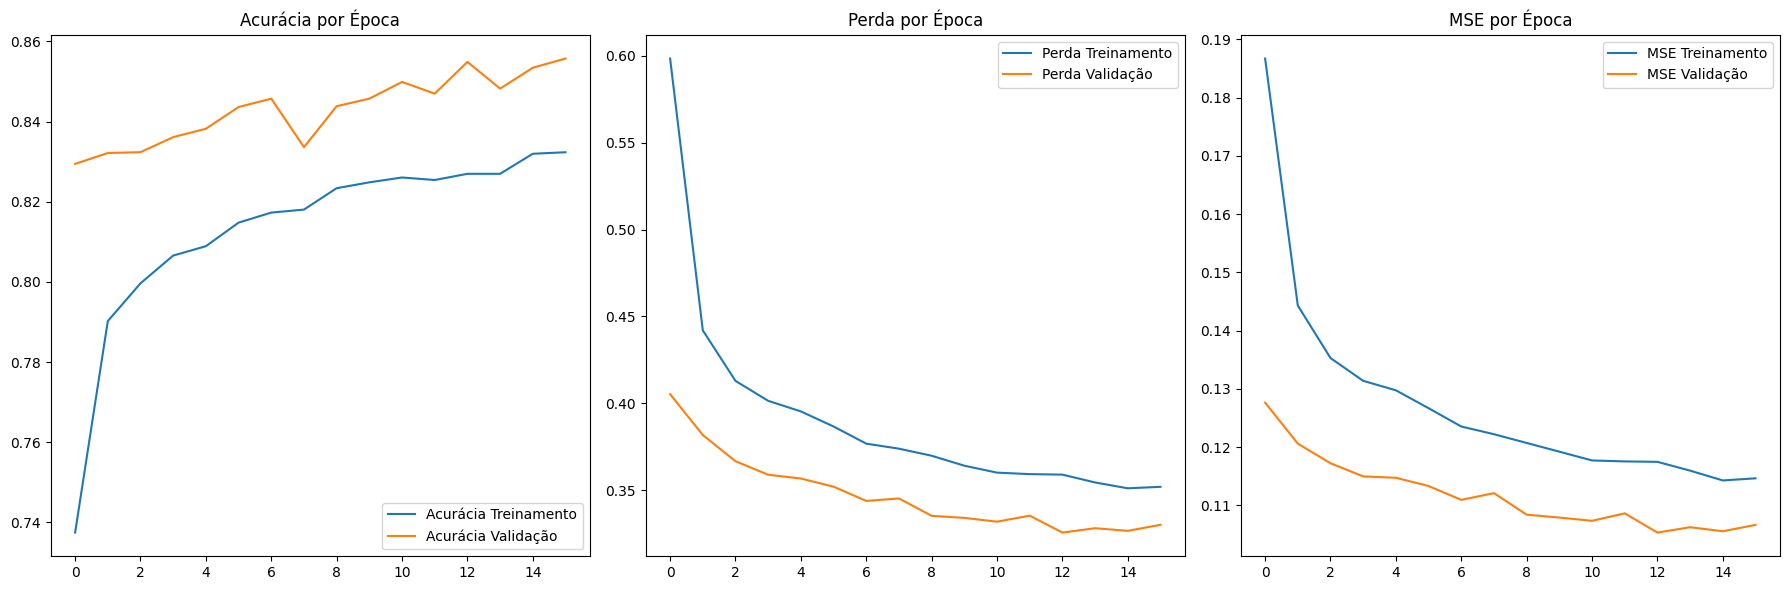

In [ ]:
# Treinando o modelo com as novas métricas
history = model.fit(
    train_generator,
    epochs=100,  # Número de épocas
    validation_data=validation_generator,
    callbacks=callbacks
)

# Função atualizada para plotar o histórico com MSE
def plot_history(history):
    acc = history.history.get('accuracy', [])
    val_acc = history.history.get('val_accuracy', [])
    loss = history.history.get('loss', [])
    val_loss = history.history.get('val_loss', [])
    mse = history.history.get('mean_squared_error', [])
    val_mse = history.history.get('val_mean_squared_error', [])
    epochs_range = range(len(acc))

    plt.figure(figsize=(18, 6))

    # Acurácia
    plt.subplot(1, 3, 1)
    plt.plot(epochs_range, acc, label='Acurácia Treinamento')
    plt.plot(epochs_range, val_acc, label='Acurácia Validação')
    plt.legend(loc='lower right')
    plt.title('Acurácia por Época')

    # Perda
    plt.subplot(1, 3, 2)
    plt.plot(epochs_range, loss, label='Perda Treinamento')
    plt.plot(epochs_range, val_loss, label='Perda Validação')
    plt.legend(loc='upper right')
    plt.title('Perda por Época')

    # Mean Squared Error
    plt.subplot(1, 3, 3)
    plt.plot(epochs_range, mse, label='MSE Treinamento')
    plt.plot(epochs_range, val_mse, label='MSE Validação')
    plt.legend(loc='upper right')
    plt.title('MSE por Época')

    plt.tight_layout()
    plt.show()

# Plotando o histórico
plot_history(history)

In [ ]:
#Gerar matrix de confusão de cada modelo

In [ ]:
#Salvar os modelos e no outro colab aplicar explicabilidade com base nbos modelos salvoS
#vOU APLICAR EXPLICABILIDADE APENAS NO MODELO QUE OBTEVE MELHOR RESULTADO



---



---



---



---



# Técnicas de Explicabilidade

In [ ]:
import os

# Caminho do diretório onde as imagens estão localizadas
input_directory = "/content/ISIC_data/ISIC_Processed_Images_Merged/Malignas"

# Função para obter os caminhos das imagens
def get_image_paths(directory, num_images=5):
    image_paths = []

    # Caminha pelos diretórios e subdiretórios
    for subdir, _, files in os.walk(directory):
        for file in files:
            # Verifica se o arquivo é uma imagem (com extensões válidas)
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_paths.append(os.path.join(subdir, file))
                # Se já pegamos o número desejado de imagens, sai do loop
                if len(image_paths) >= num_images:
                    return image_paths

    return image_paths

# Pegando 5 caminhos de imagem
image_paths = get_image_paths(input_directory, 5)

# Exibindo os caminhos das imagens
for path in image_paths:
    print(path)

/content/ISIC_data/ISIC_Processed_Images_Merged/Malignas/ISIC_0025825.jpg
/content/ISIC_data/ISIC_Processed_Images_Merged/Malignas/ISIC_0064270_0_8501.jpg
/content/ISIC_data/ISIC_Processed_Images_Merged/Malignas/ISIC_0067833_0_7133.jpg
/content/ISIC_data/ISIC_Processed_Images_Merged/Malignas/ISIC_0026327.jpg
/content/ISIC_data/ISIC_Processed_Images_Merged/Malignas/ISIC_0029271_0_8974.jpg


LIME

In [ ]:
# Instalar a biblioteca lime
!pip install lime

# Agora você pode importar o lime_image normalmente
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from lime import lime_image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import backend as K
import cv2
from PIL import Image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=8d9c930448cdd8bcec6d5e397550c2a8ace75ecfcd64577e3308eb8da08bfa39
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
# Carregar o modelo ResNet50
model = ResNet50(weights='imagenet')

img_path = '/content/ISIC_data/ISIC_Processed_Images_Merged/Malignas/ISIC_0072445.jpg'

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

# Função de predição
def predict_fn(images):
    images = tf.keras.applications.resnet50.preprocess_input(images)
    return model.predict(images)

# Explicador LIME
explainer = lime_image.LimeImageExplainer()

# Gerar a explicação
explanation = explainer.explain_instance(img_array[0], predict_fn, top_labels=5, hide_color=0, num_samples=1000)

# Visualizar a explicação
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=False)
plt.imshow(temp)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/ISIC_data/ISIC_Processed_Images_Merged/Malignas/ISIC_0072445.jpg'

In [ ]:
#Exibi imagem original
img = image.load_img(img_path, target_size=(224, 224))
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Imagem Original")
plt.axis('off')

# Exibir LIME
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=False)
plt.subplot(1, 2, 2)
plt.imshow(temp)
plt.title("Explicação LIME")
plt.axis('off')

plt.show()

GRAN-CAM

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_grad_cam(img_path, heatmap):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Redimensionar para 224x224

    heatmap = cv2.resize(heatmap, (224, 224))  # Redimensionar para 224x224

    heatmap = np.uint8(255 * heatmap)  # Converter para 8 bits (0-255)

    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = np.uint8(0.4 * heatmap + 0.6 * img)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Imagem Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Grad-CAM')
    plt.axis('off')

    plt.show()

img_path = '/content/ISIC_data/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0028543.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

heatmap = grad_cam(model, img_array)

display_grad_cam(img_path, heatmap)


SHAP

In [ ]:
'''
import shutil
import os

dir_path = '/content/ISIC_data/ISIC_Processed_Images_Merged'

if os.path.exists(dir_path):
    # Deletar o diretório e todo o seu conteúdo
    shutil.rmtree(dir_path)
    print(f"O diretório '{dir_path}' e todo o seu conteúdo foram deletados.")
else:
    print(f"O diretório '{dir_path}' não existe.")
'''

O diretório '/content/ISIC_data/ISIC_Processed_Images_Merged' e todo o seu conteúdo foram deletados.
